

# An Analysis of Customer Types

## Objective:
Comparing the implementation and visualisation techniques between Kmeans++ Clustering and Hierarchical Agglomerative Clustering. 

Scenario: To support a business owner analysing her customer base, by identifying the total number of customer groups for her business. Allowing the business owner to map and plan ahead of current and future services. 

---

### Dataset: 
Matrix of Features: 200 x 6

Shop_Customers.csv

---

#### Machine Learning Techniques Applied: 
  
1) K-means Clustering 

2) K-means++ Clustering

3) Hierarchical Agglomerative Clustering


In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#import dataset
dataset = pd.read_csv('Shop_Customers.csv')
X = dataset.iloc[:, [3,4]].values  
dataset.head()

,CustomerID,Genre,Age,Annual Income (£k),Spending Ratings (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


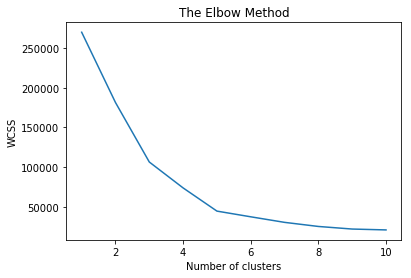

In [23]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Applying k-means clustering to the dataset
Based on the The Elbow Method above, the optimal number of clusters is n_clusters = 5. 

Each data point will be reassigned to one of the 5 nearest clusters centroid.

This will result in 5 respective segments, each customer segment exhibit a certain behaviour. 

In [24]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
Remember that: scatter(X[row, coluumn])

row of X:

    y_kmeans == 0 refers to the first cluster, where y_kmeans starts at 0, in this example the range is 0 to 4)

column of X:

    0 refers to the column of X,i.e., Salary

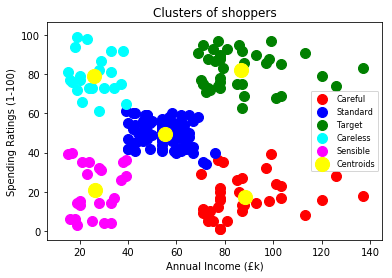

In [25]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0,1], s = 100, c = 'red', label = 'Careful')  
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1,1], s = 100, c = 'blue', label = 'Standard')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2,1], s = 100, c = 'green', label = 'Target')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3,1], s = 100, c = 'cyan', label = 'Careless')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4,1], s = 100, c = 'magenta', label = 'Sensible')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 200, c = 'yellow', label = 'Centroids')
plt.title('Clusters of shoppers')
plt.xlabel('Annual Income (£k)')
plt.ylabel('Spending Ratings (1-100)')
plt.legend(loc=0, numpoints=10, ncol=1, fontsize=8)
plt.show()

# Find the Optimal Number of Clusters 
Using Dendrogram to find the optimal number of clusters' profiles

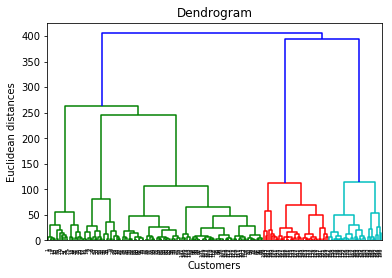

In [26]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

# Fitting Hierarchical Agglomerative Clustering to the dataset

In [27]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

# Visualising the clusters
Remember that: scatter(X[row, column])

row of X:

    y_hc == 0 refers to the first cluster, where y_hc starts at 0, in this example the range is 0 to 4)

column of X:

    0 refers to the column of X,i.e., Salary

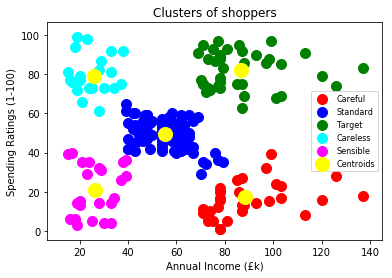

In [28]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0,1], s = 100, c = 'red', label = 'Careful')  
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1,1], s = 100, c = 'blue', label = 'Standard')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2,1], s = 100, c = 'green', label = 'Target')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3,1], s = 100, c = 'cyan', label = 'Careless')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4,1], s = 100, c = 'magenta', label = 'Sensible')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 200, c = 'yellow', label = 'Centroids')
plt.title('Clusters of shoppers')
plt.xlabel('Annual Income (£k)')
plt.ylabel('Spending Ratings (1-100)')
plt.legend(loc=0, numpoints=10, ncol=1, fontsize=8)
plt.show()